<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/M%C3%A9todo_Box_M%C3%BCller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias no uniformes
## Método Box - Müller

Dados:
$$x_1 = r\cos(\theta)$$
$$x_2 = r\sin(\theta)$$
Con
$$r = \sqrt{-2\ln(u_1)}$$
$$\theta = 2\pi u_2$$
Además
$$x_1, x_2 \sim \mathcal{N}(0, 1)$$
$$f(x_1, x_2) = \frac{1}{2\pi}e^{-\frac{(x_1^2 + x_2^2)}{2}}$$
Veamos que $u_1, u_2 \sim \mathcal{U}(0, 1)$:\
Para $u_1$:
$$x_1^2 + x_2^2 = r^2\cos^2(\theta) + r^2\sin^2(\theta) = r^2 \rightarrow r^2 = -2\ln(u_1) \sim \chi^2_2$$
Luego
$$u_1 = e^{-\frac{r^2}{2}} \sim \mathcal{U}(0, 1)$$
Para $u_2$:
$$\tan(\theta) = \frac{x_2}{x_1} \rightarrow \theta = \tan^{-1}\left(\frac{x_2}{x_1}\right) \sim \mathcal{U}(0, 2\pi)$$
Luego
$$u_2 = \frac{\theta}{2\pi} \sim \mathcal{U}(0, 1)$$\
Así, si de las expresiones para $u_1$ y $u_2$ resolvemos para $r$ y $\theta$ respectivamente, obtenemos las expresiones iniciales
$$r = \sqrt{-2\ln(u_1)}$$
$$\theta = 2\pi u_2$$
Y finalmente
$$x_1 = r\cos(\theta)$$
$$x_2 = r\sin(\theta)$$
Nos asegura que $x_1, x_2 \sim \mathcal{N}(0, 1)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

Función que simula $2n$ números pseudoaleatorios con media $\mu$ y desviación estándar $\sigma$ (por defecto, siguen una distribución normal estándar)

In [15]:
def norm(n, mu = 0, s = 1):
  X = []
  for i in range(n):
    u1, u2 = random(), random()
    R = np.sqrt(-2*np.log(u1))
    theta = 2*np.pi*u2
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    X.extend([mu + x*s, mu + y*s])
  return X

Histograma de 100,000 números generados

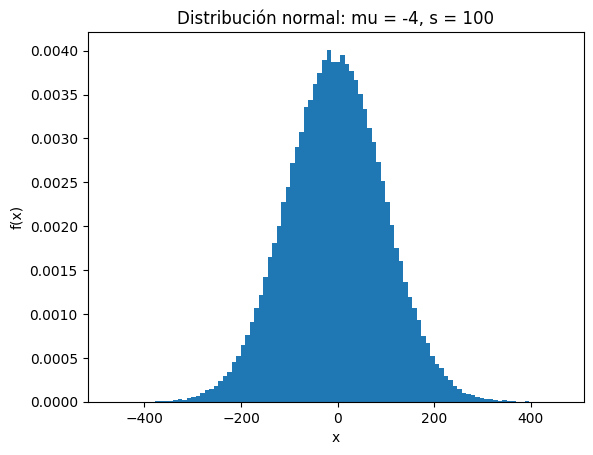

In [20]:
mu, s = -4, 100
x = norm(100000, mu, s)
plt.hist(x, bins = 100, density = True)
plt.title(f"Distribución normal: mu = {mu}, s = {s}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Comparación entre media y varianzas simuladas y teóricas

In [22]:
mu_sim = np.mean(x)
s_sim = np.var(x)


print("Media teórica:", mu)
print("Media simulada:", mu_sim)

print("\nVarianza teórica:", s**2)
print("Varianza simulada:", s_sim)

Media teórica: -4
Media simulada: -4.262358606471668

Varianza teórica: 10000
Varianza simulada: 10054.969840159574
